In [1]:
# Library untuk dataframe dan visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# Import library untuk Clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_excel('Kompetitorv1.xlsx', 'PTO')

In [3]:
df

,Urut,No,Produk,Exporter,Sum_Of_Net_Weight_Kg,FOB_Value_USD,FOB_Net_Weight,Importer,Destination_Country,Description
0,1,2020-09-04 08:00:00,PATCHOULI OIL,PT.FIRMENICH INDONESIA,1260.0,74041.00,58.762698,FIRMENICH AROMATICS PRODUCTION (INDIA) PVT. LTD.,INDIA,PATCHOULI EO 970905 (ESSENTIAL OIL FOR MFG OF ...
1,2,2020-09-07 08:00:00,PATCHOULI OIL,KTRADE EXPORTS PTE. LTD.,2000.0,101000.00,50.500000,ADITI INTERNATIONAL,INDIA,PATCHOULI OIL [ INDIA-INDONESIA FTA CERT.NO: 0...
2,3,2020-09-07 08:00:00,PATCHOULI OIL,PT VAN AROMA,600.0,5700.00,9.500000,SYMRISE PRIVATE LIMITED,INDIA,PATCHOULI OIL TERPENES
3,4,2020-09-07 08:00:00,PATCHOULI OIL,PT.MIGNON SISTA INTERNATIONAL,200.0,9980.00,49.900000,VIGIROM PRIVATE LIMITED,INDIA,PATCHOULI OIL (LOT # PT012001)
4,5,2020-09-12 08:00:00,PATCHOULI OIL,PT.VAN AROMA,1000.0,55000.00,55.000000,AQUILA ORGANICS PVT.LTD.,INDIA,OIL PATCHOULI PTK RED BARREL ( ASEAN-INDIA FRE...
...,...,...,...,...,...,...,...,...,...,...
570,573,2022-02-11 08:00:00,PATCHOULI OIL,PT. VAN AROMA,2400.0,108030.96,45.012900,NISHANT AROMAS PRIVATE LIMITED,INDIA,PATCHOULI SULAWESI DARK MIN 30 PA (ESSENTIAL O...
571,569,2022-02-21 08:00:00,PATCHOULI OIL,PT. VAN AROMA,6000.0,234918.81,39.153135,SRI VENKATESH AROMAS,INDIA,PATCHOULI OIL SULAWESI DARK MIN 30 PA (USE FOR...
572,568,2022-02-22 08:00:00,PATCHOULI OIL,M/S. PT.VAN AROMA,600.0,28087.77,46.812950,AARAV FRAGRANCES AND FLAVORS PRIVATE LIMITED,INDIA,"PATCHOULI OIL SUMATRA DARK, MIN 30 PA (3 MS DR..."
573,567,2022-02-24 08:00:00,PATCHOULI OIL,PT.INDESSO AROMA,1000.0,43269.37,43.269370,VIGIROM PRIVATE LIMITED,INDIA,PATCHOULI OIL - 887


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Urut                  575 non-null    int64         
 1   No                    575 non-null    datetime64[ns]
 2   Produk                575 non-null    object        
 3   Exporter              575 non-null    object        
 4   Sum_Of_Net_Weight_Kg  575 non-null    float64       
 5   FOB_Value_USD         575 non-null    float64       
 6   FOB_Net_Weight        575 non-null    float64       
 7   Importer              575 non-null    object        
 8   Destination_Country   575 non-null    object        
 9   Description           575 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 45.0+ KB


In [5]:
df = df.dropna()
df.shape

(575, 10)

In [6]:
df['Importer'] = df.Importer.astype(str)

In [7]:
start_date = pd.to_datetime('2021-9-1')
end_date = pd.to_datetime('2022-3-31')
res = df[df['No'].between(start_date, end_date)]
print(res)


     Urut                  No         Produk  \
499   500 2021-09-03 08:00:00  PATCHOULI OIL   
500   501 2021-09-03 08:00:00  PATCHOULI OIL   
501   502 2021-09-18 08:00:00  PATCHOULI OIL   
502   503 2021-09-18 08:00:00  PATCHOULI OIL   
503   504 2021-09-20 08:00:00  PATCHOULI OIL   
..    ...                 ...            ...   
570   573 2022-02-11 08:00:00  PATCHOULI OIL   
571   569 2022-02-21 08:00:00  PATCHOULI OIL   
572   568 2022-02-22 08:00:00  PATCHOULI OIL   
573   567 2022-02-24 08:00:00  PATCHOULI OIL   
574   566 2022-02-28 08:00:00  PATCHOULI OIL   

                             Exporter  Sum_Of_Net_Weight_Kg  FOB_Value_USD  \
499                      PT VAN AROMA                1000.0       40900.00   
500             PT.INDOWANGI NUSAJAYA                 400.0       17400.00   
501        PT. AROMA ATSIRI INDONESIA                3000.0      118500.00   
502        PT. AROMA ATSIRI INDONESIA                3000.0      121500.00   
503  PT.NATURA AROMATIK NUSANTAAR

In [8]:
# Membuat atribut baru : TotalValue
# df['TotalValue'] = df['Sum_Of_Net_Weight_Kg']*df['FOB_Net_Weight']
rfm_m = res.groupby('Importer')['Sum_Of_Net_Weight_Kg'].sum()
rfm_m = rfm_m.reset_index()
rfm_m

,Importer,Sum_Of_Net_Weight_Kg
0,AARAV FRAGRANCES AND FLAVORS PRIVATE LIMITED,600.0
1,ADITI INTERNATIONAL,9000.0
2,ARIHANT TRADING COMPANY,5000.0
3,ARPAN AROMATICS,2600.0
4,ASHAPURA AROMAS PRIVATE LIMITED,40000.0
5,ASHAPURA AROMAS PVT LTD,7200.0
6,ASSOCIATE ALLIED CHEMICALS (INDIA) PRIVATE LIM...,4000.0
7,ASSOCIATE ALLIED CHEMICALS I PVT LTD,8000.0
8,DARSHAN INTERNATIONAL,1000.0
9,DHL LOGISTICS PRIVATE LIMITED,6020.0


In [9]:
rfm_r = res.groupby('Importer')['FOB_Net_Weight'].mean()
rfm_r = rfm_r.reset_index()
rfm_r.columns = ['Importer', 'FOB_Net_Weight']
rfm_r

,Importer,FOB_Net_Weight
0,AARAV FRAGRANCES AND FLAVORS PRIVATE LIMITED,46.812950
1,ADITI INTERNATIONAL,36.466667
2,ARIHANT TRADING COMPANY,42.525000
3,ARPAN AROMATICS,38.500000
4,ASHAPURA AROMAS PRIVATE LIMITED,36.925267
5,ASHAPURA AROMAS PVT LTD,35.139021
6,ASSOCIATE ALLIED CHEMICALS (INDIA) PRIVATE LIM...,38.000000
7,ASSOCIATE ALLIED CHEMICALS I PVT LTD,35.787600
8,DARSHAN INTERNATIONAL,45.400000
9,DHL LOGISTICS PRIVATE LIMITED,41.130317


In [10]:
# Menggabungkan (merging) dua dataframe
rfm = pd.merge(rfm_m, rfm_r, on='Importer', how='inner')
rfm

,Importer,Sum_Of_Net_Weight_Kg,FOB_Net_Weight
0,AARAV FRAGRANCES AND FLAVORS PRIVATE LIMITED,600.0,46.812950
1,ADITI INTERNATIONAL,9000.0,36.466667
2,ARIHANT TRADING COMPANY,5000.0,42.525000
3,ARPAN AROMATICS,2600.0,38.500000
4,ASHAPURA AROMAS PRIVATE LIMITED,40000.0,36.925267
5,ASHAPURA AROMAS PVT LTD,7200.0,35.139021
6,ASSOCIATE ALLIED CHEMICALS (INDIA) PRIVATE LIM...,4000.0,38.000000
7,ASSOCIATE ALLIED CHEMICALS I PVT LTD,8000.0,35.787600
8,DARSHAN INTERNATIONAL,1000.0,45.400000
9,DHL LOGISTICS PRIVATE LIMITED,6020.0,41.130317


In [11]:
# Membuat atribut baru : Frequency
rfm_f = res.groupby('Importer')['Urut'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['Importer', 'Frequency']
rfm_f

,Importer,Frequency
0,AARAV FRAGRANCES AND FLAVORS PRIVATE LIMITED,1
1,ADITI INTERNATIONAL,6
2,ARIHANT TRADING COMPANY,2
3,ARPAN AROMATICS,2
4,ASHAPURA AROMAS PRIVATE LIMITED,5
5,ASHAPURA AROMAS PVT LTD,1
6,ASSOCIATE ALLIED CHEMICALS (INDIA) PRIVATE LIM...,1
7,ASSOCIATE ALLIED CHEMICALS I PVT LTD,1
8,DARSHAN INTERNATIONAL,1
9,DHL LOGISTICS PRIVATE LIMITED,2


In [12]:
# Menggabungkan (merging) dua dataframe
rfm = pd.merge(rfm, rfm_f, on='Importer', how='inner')
rfm

,Importer,Sum_Of_Net_Weight_Kg,FOB_Net_Weight,Frequency
0,AARAV FRAGRANCES AND FLAVORS PRIVATE LIMITED,600.0,46.812950,1
1,ADITI INTERNATIONAL,9000.0,36.466667,6
2,ARIHANT TRADING COMPANY,5000.0,42.525000,2
3,ARPAN AROMATICS,2600.0,38.500000,2
4,ASHAPURA AROMAS PRIVATE LIMITED,40000.0,36.925267,5
5,ASHAPURA AROMAS PVT LTD,7200.0,35.139021,1
6,ASSOCIATE ALLIED CHEMICALS (INDIA) PRIVATE LIM...,4000.0,38.000000,1
7,ASSOCIATE ALLIED CHEMICALS I PVT LTD,8000.0,35.787600,1
8,DARSHAN INTERNATIONAL,1000.0,45.400000,1
9,DHL LOGISTICS PRIVATE LIMITED,6020.0,41.130317,2


Text(0.5, 0, 'Attributes')

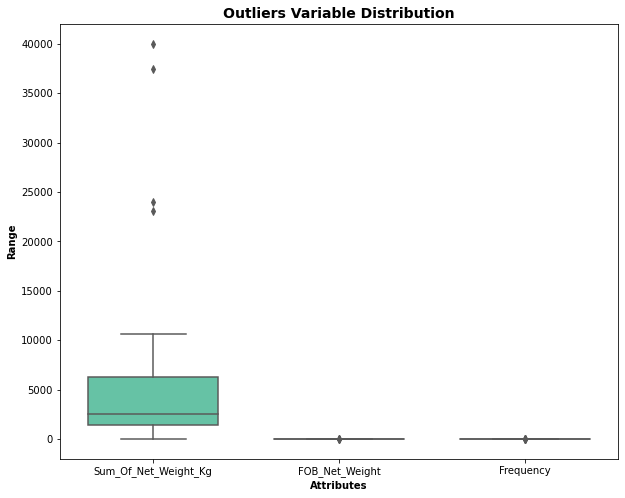

In [13]:
attributes = ['Sum_Of_Net_Weight_Kg', 'FOB_Net_Weight', 'Frequency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [14]:
# Removing (statistical) outliers for Monetary
Q1 = rfm.Sum_Of_Net_Weight_Kg.quantile(0.05)
Q3 = rfm.Sum_Of_Net_Weight_Kg.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Sum_Of_Net_Weight_Kg >= Q1 - 1.5*IQR) & (rfm.Sum_Of_Net_Weight_Kg <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.FOB_Net_Weight.quantile(0.05)
Q3 = rfm.FOB_Net_Weight.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.FOB_Net_Weight >= Q1 - 1.5*IQR) & (rfm.FOB_Net_Weight <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [15]:
# Rescaling Atribute
rfm_df = rfm[['Sum_Of_Net_Weight_Kg', 'FOB_Net_Weight', 'Frequency']]
# Instantiate
scaler = StandardScaler()
# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(36, 3)

In [16]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Sum_Of_Net_Weight_Kg', 'FOB_Net_Weight', 'Frequency']
rfm_df_scaled.head()

,Sum_Of_Net_Weight_Kg,FOB_Net_Weight,Frequency
0,-0.626085,0.778655,-0.508987
1,0.264481,-0.755640,1.781453
2,-0.159598,0.142776,-0.050899
3,-0.414046,-0.454109,-0.050899
4,3.551097,-0.687633,1.323365


In [17]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

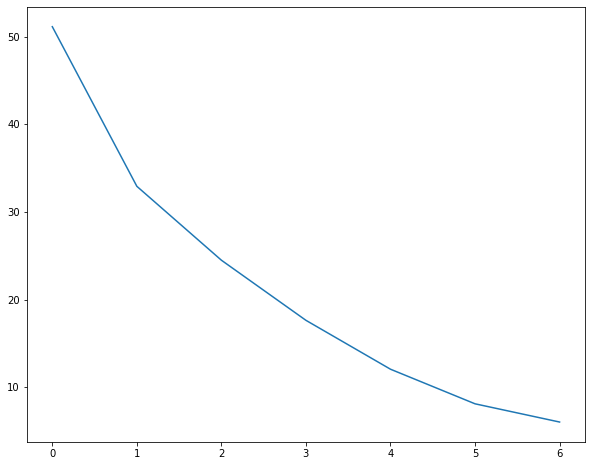

In [18]:
# Elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [19]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    
    # Initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    cluster_labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6258892732205202
For n_clusters=3, the silhouette score is 0.36455470268268625
For n_clusters=4, the silhouette score is 0.40186579127012034
For n_clusters=5, the silhouette score is 0.4456271148968311
For n_clusters=6, the silhouette score is 0.41668557671618733
For n_clusters=7, the silhouette score is 0.43777134622665403
For n_clusters=8, the silhouette score is 0.42927912112304084


In [20]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [21]:
# Assign the label
# rfm.to_csv (r'D:\DATA ANALYST\export_dataframe.csv', index = False, header=True)
rfm['Cluster_Id'] = kmeans.labels_
rfm.to_excel (r'D:\DATA ANALYST\Hasil_Cluster_Importer_INDIA.xlsx', sheet_name='Cluster', index = False)
rfm

,Importer,Sum_Of_Net_Weight_Kg,FOB_Net_Weight,Frequency,Cluster_Id
0,AARAV FRAGRANCES AND FLAVORS PRIVATE LIMITED,600.0,46.812950,1,2
1,ADITI INTERNATIONAL,9000.0,36.466667,6,0
2,ARIHANT TRADING COMPANY,5000.0,42.525000,2,0
3,ARPAN AROMATICS,2600.0,38.500000,2,0
4,ASHAPURA AROMAS PRIVATE LIMITED,40000.0,36.925267,5,1
5,ASHAPURA AROMAS PVT LTD,7200.0,35.139021,1,0
6,ASSOCIATE ALLIED CHEMICALS (INDIA) PRIVATE LIM...,4000.0,38.000000,1,0
7,ASSOCIATE ALLIED CHEMICALS I PVT LTD,8000.0,35.787600,1,0
8,DARSHAN INTERNATIONAL,1000.0,45.400000,1,2
9,DHL LOGISTICS PRIVATE LIMITED,6020.0,41.130317,2,0


<AxesSubplot:xlabel='Cluster_Id', ylabel='Sum_Of_Net_Weight_Kg'>

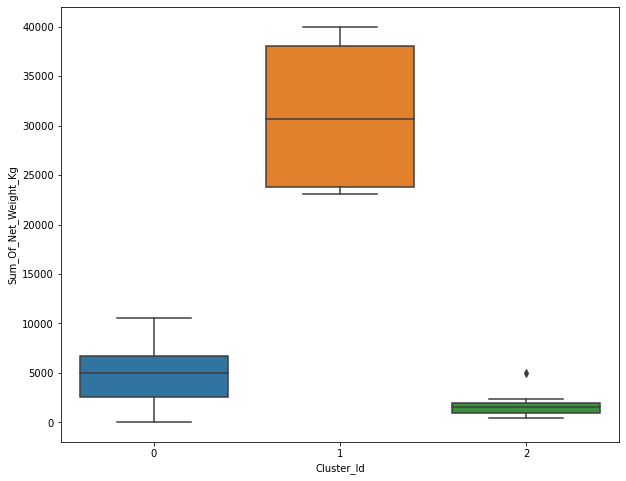

In [22]:
# Boxplot untuk memvisualisasikan Cluster Id dan Monetary
sns.boxplot(x='Cluster_Id', y='Sum_Of_Net_Weight_Kg', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='FOB_Net_Weight'>

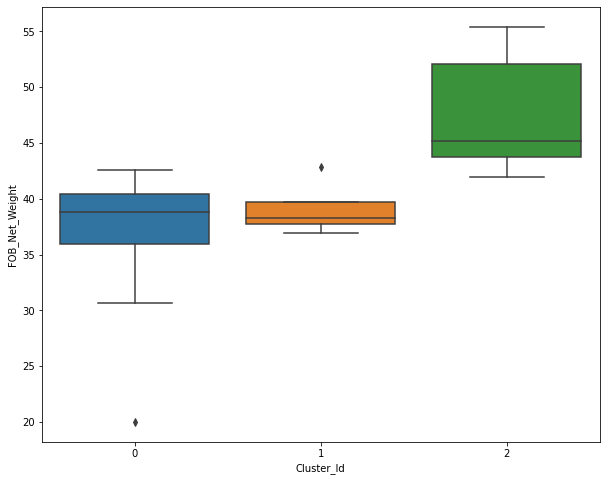

In [23]:
# Boxplot untuk memvisualisasikan Cluster Id vs Recency
sns.boxplot(x='Cluster_Id', y='FOB_Net_Weight', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

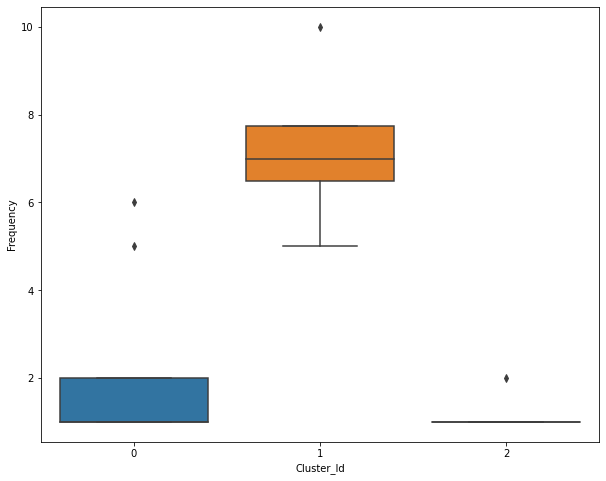

In [24]:
# Boxplot untuk memvisualisasikan Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)